# Apple Stock LSTM Prediction Model

Import needed Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

Import dataset:

In [2]:
df=pd.read_csv("data.csv")
df.head()

,Date,Close,Volume,Open,High,Low
0,07/01/2022,$138.93,71051550,$136.04,$139.04,$135.66
1,06/30/2022,$136.72,98964470,$137.25,$138.37,$133.7737
2,06/29/2022,$139.23,66242410,$137.46,$140.67,$136.67
3,06/28/2022,$137.44,67315330,$142.13,$143.422,$137.325
4,06/27/2022,$141.66,70207910,$142.695,$143.49,$140.965


Substract Date and close columns:

In [3]:
df = df[['Date', 'Close']]
df.head()

,Date,Close
0,07/01/2022,$138.93
1,06/30/2022,$136.72
2,06/29/2022,$139.23
3,06/28/2022,$137.44
4,06/27/2022,$141.66


Remove “$” sign:

In [4]:
df = df.replace({'\$':''}, regex = True)

Convert closing price datatype to float and date to datetime:

In [5]:
df = df.astype({"Close": float})
df["Date"] = pd.to_datetime(df.Date, format="%m/%d/%Y")
df.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

Definde date as index for visualization:

In [6]:
df.index = df['Date']

Construct the initial line chart:

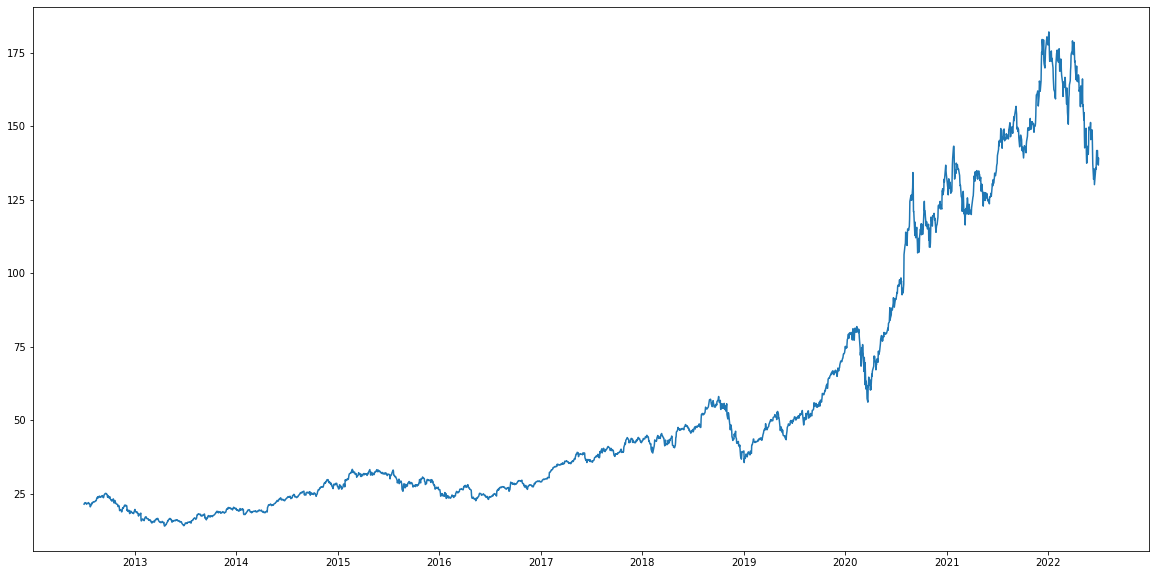

In [7]:
plt.plot(df["Close"],label='Close Price history')

# Long Short-Term Memory Prediction Model:

Data preparation:

In [8]:
df = df.sort_index(ascending=True,axis=0)

data = pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

for i in range(0,len(data)):
    data["Date"][i]=(df['Date'][i])
    data["Close"][i]=df["Close"][i]

data.head()

,Date,Close
0,2012-07-03 00:00:00,21.4075
1,2012-07-05 00:00:00,21.7836
2,2012-07-06 00:00:00,21.6386
3,2012-07-09 00:00:00,21.9247
4,2012-07-10 00:00:00,21.7218


Min-Max Scaler:
(I use 80% as train data and 20% as test data)

In [9]:
data.index=data.Date

data.drop('Date',axis=1,inplace=True)

finalData = data.values

trainData=finalData[0:1964,:]
validData=finalData[1964:,:]

scaler=MinMaxScaler(feature_range=(0,1))
scaledData=scaler.fit_transform(finalData)

xTrain,yTrain=[],[]


scaledData.shape[0]



2516

In [10]:
for i in range(60,scaledData.shape[0]):
    xTrain.append(scaledData[i-60:i,0])
    yTrain.append(scaledData[i,0])

Convert xTrain and yTrain to numpy arrays in order to train and test the model with the data:

In [11]:
xTrain,yTrain=np.array(xTrain),np.array(yTrain)
xTrain=np.reshape(xTrain,(xTrain.shape[0],xTrain.shape[1],1))

xTrain.shape

(2456, 60, 1)

Define LSTM Model:

In [12]:
lstm=Sequential()
lstm.add(LSTM(units=50,return_sequences=True,input_shape=(xTrain.shape[1],1)))
lstm.add(LSTM(units=50))
lstm.add(Dense(1))

print(lstm.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________
None


Train & Test Data:

In [13]:
inputs_data=data[len(data)-len(validData)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

print(inputs_data)

[[0.39947936]
 [0.39878022]
 [0.37741911]
 [0.3761547 ]
 [0.39131276]
 [0.39518036]
 [0.40077352]
 [0.39306806]
 [0.39532912]
 [0.39244329]
 [0.40373373]
 [0.40026776]
 [0.40038676]
 [0.39153589]
 [0.39840833]
 [0.39346969]
 [0.38268501]
 [0.36056527]
 [0.34554109]
 [0.35233916]
 [0.32388248]
 [0.32364448]
 [0.36150242]
 [0.34738565]
 [0.36734846]
 [0.3527408 ]
 [0.34695426]
 [0.31294905]
 [0.34146523]
 [0.32672369]
 [0.28626255]
 [0.33050205]
 [0.27730755]
 [0.29314987]
 [0.28394199]
 [0.28113053]
 [0.25801413]
 [0.2507698 ]
 [0.28425437]
 [0.28223131]
 [0.30145035]
 [0.28553366]
 [0.29605058]
 [0.29527705]
 [0.27537374]
 [0.28135366]
 [0.27611752]
 [0.30744515]
 [0.30292302]
 [0.3128003 ]
 [0.31565638]
 [0.32348085]
 [0.34400893]
 [0.34011157]
 [0.34347341]
 [0.33768687]
 [0.328955  ]
 [0.31622164]
 [0.32772034]
 [0.32612867]
 [0.33793975]
 [0.33823726]
 [0.33140945]
 [0.34502045]
 [0.35404983]
 [0.34701376]
 [0.35309781]
 [0.35964299]
 [0.36420974]
 [0.368836  ]
 [0.37834139]
 [0.38

In [14]:
lstm.compile(loss='mean_squared_error',optimizer='adam')
lstm.fit(xTrain,yTrain,epochs=1,batch_size=1,verbose=2)

X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

2456/2456 - 45s - loss: 0.0011


Prediction:

In [15]:
closingPrice=lstm.predict(X_test)
closingPrice=scaler.inverse_transform(closingPrice)

# Prediction Result:

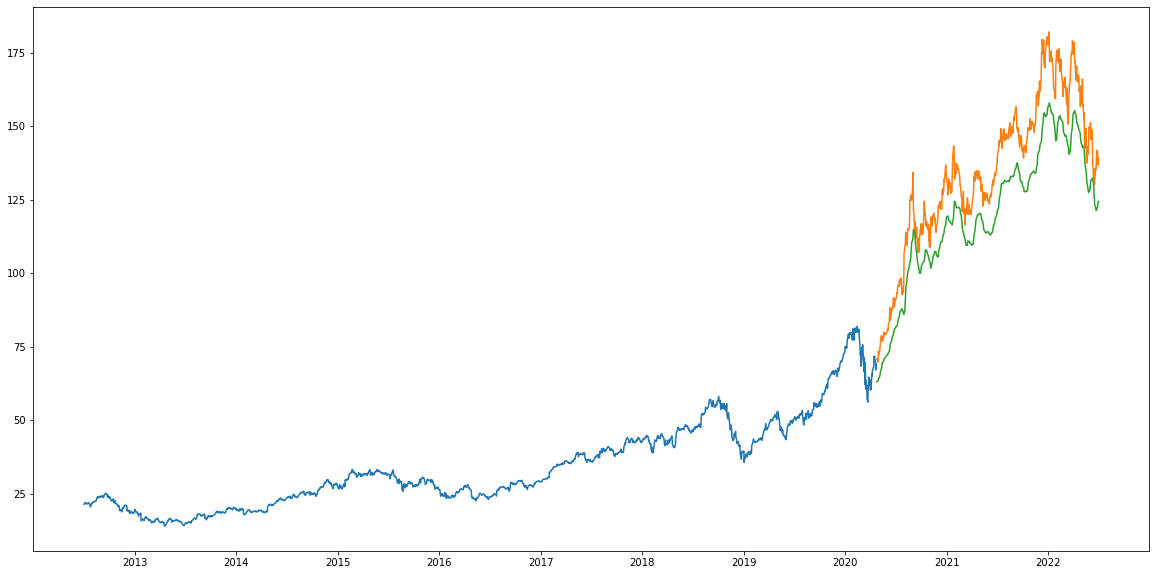

In [25]:
trainData=data[:1964]
validData=data[1964:].copy(deep=True)
validData['Predictions']=closingPrice
plt.plot(trainData["Close"])
plt.plot(validData[['Close',"Predictions"]])

Visualization: red color is the actual data, the green color is predicted